In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["fast"])
pd.set_option('display.max_columns', None)

from dython.nominal import identify_numeric_columns,identify_nominal_columns,associations
from joblib import dump

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

In [297]:
df = pd.read_csv('dataset/bank-additional-full.csv', delimiter=';')
df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         mon       261         1    999         0   
1  telephone   may         mon       149         1    999         0   
2  telephone   may         mon       226         1    999         0   
3  telephone   may         mon       151         1    999         0   
4  telephone   may         mon       307         1    999         0   
5  telephone   may         mon       198         1    999         0   
6  telephone   may         mon       139         1    999         0   
7  telephone   may         mon       217         1    999         0   
8  telephone   may         mon       380         1    999         0   
9  telephone   may         mon        50         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994          -36.4      4.857   
1  nonexistent           1.1          93.994          -36.4      4.857   
2  nonexistent           1.1          93.994          -36.4      4.857   
3  nonexistent           1.1          93.994          -36.4      4.857   
4  nonexistent           1.1          93.994          -36.4      4.857   
5  nonexistent           1.1          93.994          -36.4      4.857   
6  nonexistent           1.1          93.994          -36.4      4.857   
7  nonexistent           1.1          93.994          -36.4      4.857   
8  nonexistent           1.1          93.994          -36.4      4.857   
9  nonexistent           1.1          93.994          -36.4      4.857   

   nr.employed   y  
0       5191.0  no  
1       5191.0  no  
2       5191.0  no  
3       5191.0  no  
4       5191.0  no  
5       5191.0  no  
6       5191.0  no  
7       5191.0  no  
8       5191.0  no  
9       5191.0  no

# Data Preprocessing

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [299]:
df.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [300]:
df.describe(include='object').T

count unique                top   freq
job          41188     12             admin.  10422
marital      41188      4            married  24928
education    41188      8  university.degree  12168
default      41188      3                 no  32588
housing      41188      3                yes  21576
loan         41188      3                 no  33950
contact      41188      2           cellular  26144
month        41188     10                may  13769
day_of_week  41188      5                thu   8623
poutcome     41188      3        nonexistent  35563
y            41188      2                 no  36548

In [301]:
df = df.replace('unknown',np.nan)
df = df.dropna()
df.head(10)

age          job   marital            education default housing loan  \
0    56    housemaid   married             basic.4y      no      no   no   
2    37     services   married          high.school      no     yes   no   
3    40       admin.   married             basic.6y      no      no   no   
4    56     services   married          high.school      no      no  yes   
6    59       admin.   married  professional.course      no      no   no   
8    24   technician    single  professional.course      no     yes   no   
9    25     services    single          high.school      no     yes   no   
11   25     services    single          high.school      no     yes   no   
12   29  blue-collar    single          high.school      no      no  yes   
13   57    housemaid  divorced             basic.4y      no     yes   no   

      contact month day_of_week  duration  campaign  pdays  previous  \
0   telephone   may         mon       261         1    999         0   
2   telephone   may         mon       226         1    999         0   
3   telephone   may         mon       151         1    999         0   
4   telephone   may         mon       307         1    999         0   
6   telephone   may         mon       139         1    999         0   
8   telephone   may         mon       380         1    999         0   
9   telephone   may         mon        50         1    999         0   
11  telephone   may         mon       222         1    999         0   
12  telephone   may         mon       137         1    999         0   
13  telephone   may         mon       293         1    999         0   

       poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0   nonexistent           1.1          93.994          -36.4      4.857   
2   nonexistent           1.1          93.994          -36.4      4.857   
3   nonexistent           1.1          93.994          -36.4      4.857   
4   nonexistent           1.1          93.994          -36.4      4.857   
6   nonexistent           1.1          93.994          -36.4      4.857   
8   nonexistent           1.1          93.994          -36.4      4.857   
9   nonexistent           1.1          93.994          -36.4      4.857   
11  nonexistent           1.1          93.994          -36.4      4.857   
12  nonexistent           1.1          93.994          -36.4      4.857   
13  nonexistent           1.1          93.994          -36.4      4.857   

    nr.employed   y  
0        5191.0  no  
2        5191.0  no  
3        5191.0  no  
4        5191.0  no  
6        5191.0  no  
8        5191.0  no  
9        5191.0  no  
11       5191.0  no  
12       5191.0  no  
13       5191.0  no

Mencari nilai korelasi untuk setiap variabel

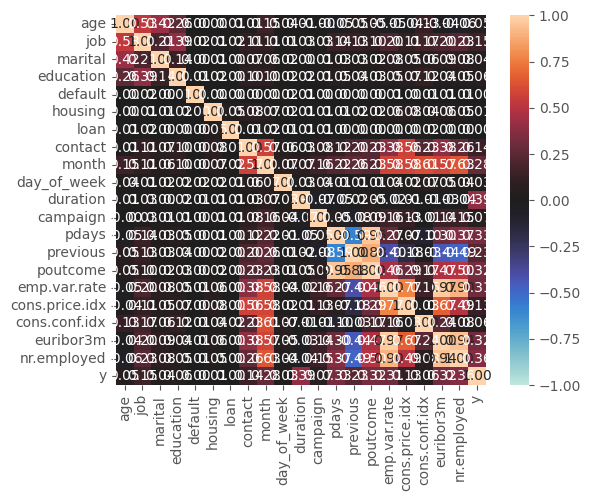

In [302]:
corr = associations(df)

In [303]:
df_corr = corr['corr'][['y']].iloc[:-1].sort_values('y', ascending = False)
df_corr.style.background_gradient()

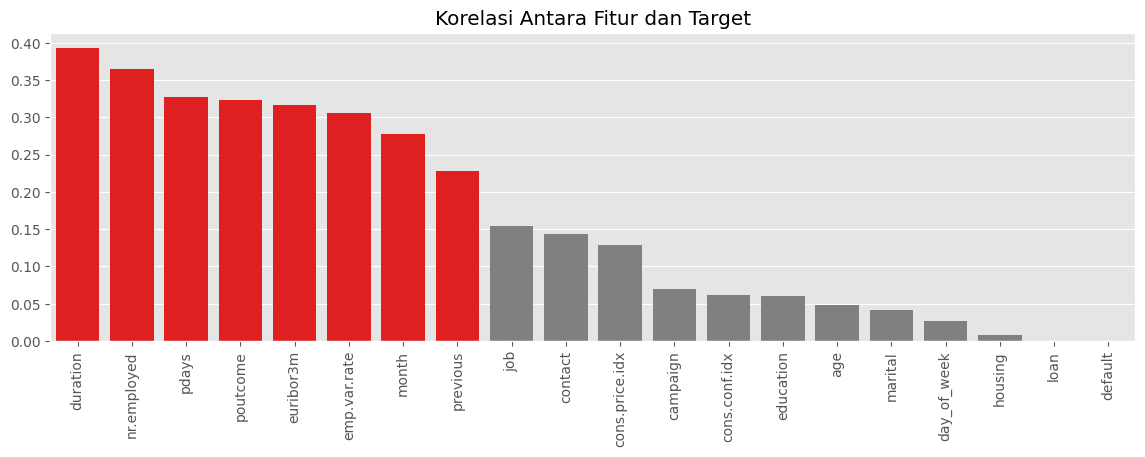

In [304]:
plt.figure(figsize=(14,4))
sns.barplot(data=df_corr,x=df_corr.index,y="y",palette=["red" if i >= 0.2 else "grey" for i in df_corr["y"]])
plt.title("Korelasi Antara Fitur dan Target")
plt.xticks(rotation=90)
plt.ylabel("")
plt.show()

Menghapus variabel yang memiliki tingkat korelasi lemah

In [305]:
df = df[list(df_corr[df_corr['y'] >= 0.2].index) + ['y']]
df.head(10)

duration  nr.employed  pdays     poutcome  euribor3m  emp.var.rate month  \
0        261       5191.0    999  nonexistent      4.857           1.1   may   
2        226       5191.0    999  nonexistent      4.857           1.1   may   
3        151       5191.0    999  nonexistent      4.857           1.1   may   
4        307       5191.0    999  nonexistent      4.857           1.1   may   
6        139       5191.0    999  nonexistent      4.857           1.1   may   
8        380       5191.0    999  nonexistent      4.857           1.1   may   
9         50       5191.0    999  nonexistent      4.857           1.1   may   
11       222       5191.0    999  nonexistent      4.857           1.1   may   
12       137       5191.0    999  nonexistent      4.857           1.1   may   
13       293       5191.0    999  nonexistent      4.857           1.1   may   

    previous   y  
0          0  no  
2          0  no  
3          0  no  
4          0  no  
6          0  no  
8          0  no  
9          0  no  
11         0  no  
12         0  no  
13         0  no

mengidentifikasi kolom numerik dan kategorik

In [306]:
cat_columns, num_columns = identify_nominal_columns(df), identify_numeric_columns(df)
print('Categorical columns : ', cat_columns)
print('Numerical columns   : ', num_columns)

Categorical columns :  ['poutcome', 'month', 'y']
Numerical columns   :  ['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous']


In [307]:
for i in cat_columns:
    print(f'{i} = {df[i].unique()}')

poutcome = ['nonexistent' 'failure' 'success']
month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
y = ['no' 'yes']


memberi label pada data kategorik

In [308]:
le = LabelEncoder()
df_encoded = df[cat_columns].apply(le.fit_transform)

df_not_encoded = df[num_columns]

In [309]:
df = pd.concat([df_not_encoded, df_encoded],axis = 1)
df.head(10)

duration  nr.employed  pdays  euribor3m  emp.var.rate  previous  poutcome  \
0        261       5191.0    999      4.857           1.1         0         1   
2        226       5191.0    999      4.857           1.1         0         1   
3        151       5191.0    999      4.857           1.1         0         1   
4        307       5191.0    999      4.857           1.1         0         1   
6        139       5191.0    999      4.857           1.1         0         1   
8        380       5191.0    999      4.857           1.1         0         1   
9         50       5191.0    999      4.857           1.1         0         1   
11       222       5191.0    999      4.857           1.1         0         1   
12       137       5191.0    999      4.857           1.1         0         1   
13       293       5191.0    999      4.857           1.1         0         1   

    month  y  
0       6  0  
2       6  0  
3       6  0  
4       6  0  
6       6  0  
8       6  0  
9       6  0  
11      6  0  
12      6  0  
13      6  0

memeriksa missing value

In [310]:
df.isna().sum()

duration        0
nr.employed     0
pdays           0
euribor3m       0
emp.var.rate    0
previous        0
poutcome        0
month           0
y               0
dtype: int64

membuat variabel X (fitur) dan y (target)

In [311]:
X = df.drop(columns = 'y')
y = df['y']

memisahkan dataset menjadi training dan testing

In [312]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=313)

print(f'Training dataset\t: {np.round(len(X_train)/len(X)*100,3)}%')
print(f'Testing dataset\t\t: {np.round(len(X_test)/len(X)*100,3)}%')

Training dataset	: 69.998%
Testing dataset		: 30.002%


scaler untuk variabel X

In [313]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# Logistic Regression

membuat model

In [314]:
lr_model = LogisticRegression(class_weight='balanced',random_state=313,max_iter=5000)
lr_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=313)

mempredikssi menggunakan model

In [315]:
lr_pred = lr_model.predict(scaled_X_test)

evaluasi model

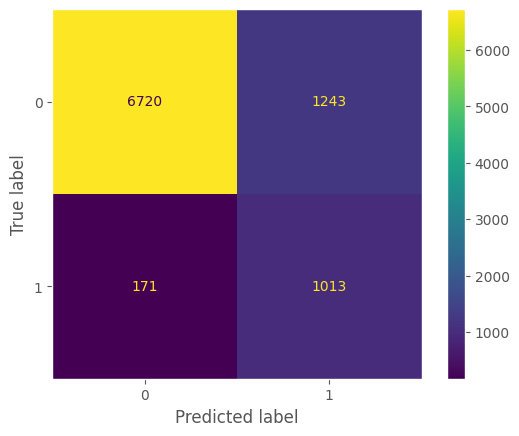

Accuracy Score: 84.5%


In [316]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,lr_pred,ax=plt.gca())
plt.grid(False)
plt.show()

lr_accuracy = np.round(accuracy_score(y_test,lr_pred),3)
print(f"Accuracy Score: {lr_accuracy*100}%")

nilai accuracy, precision, recall, dan f1

In [317]:
lr_precision=np.round(precision_score(y_test, lr_pred),3)
lr_recall=np.round(recall_score(y_test, lr_pred),3)
lr_f1=np.round(f1_score(y_test, lr_pred),3)

In [318]:
lr_score = {
    'Model': 'Logistic Regression',
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'f1': lr_f1
}
lr_score = pd.DataFrame(lr_score, index=[''])
lr_score

Model  Accuracy  Precision  Recall     f1
  Logistic Regression     0.845      0.449   0.856  0.589

fitting seluruh dataset untuk membuat final model

In [319]:
final_lr_model = LogisticRegression(class_weight="balanced",random_state=313,max_iter=5000)
final_lr_model.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=313)

# K-Nearest Neighbors (KNN)

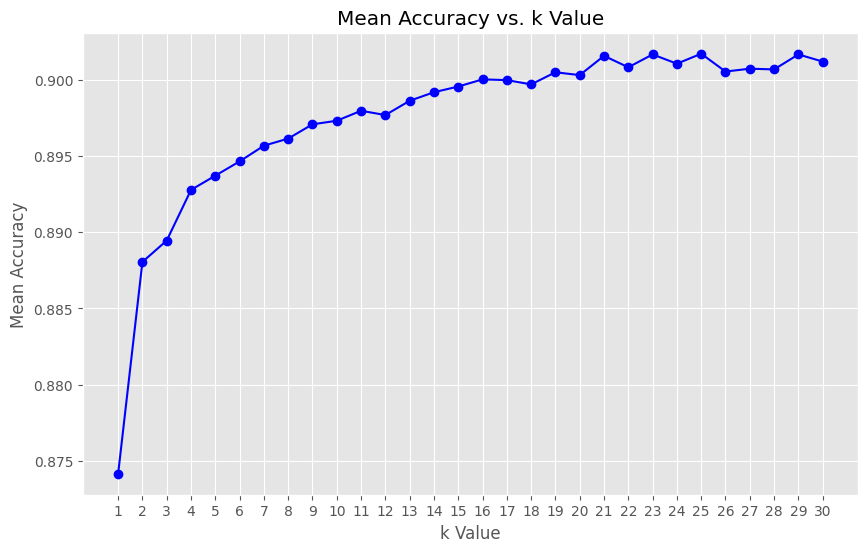

In [320]:
k_range = list(range(1,31))
mean_accuracies = []
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracies.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_accuracies, marker='o', linestyle='-', color='b')
plt.title('Mean Accuracy vs. k Value')
plt.xlabel('k Value')
plt.xticks(k_range)
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

In [321]:
optimal_k = k_range[np.argmax(mean_accuracies)]
print(f"Optimal k value: {optimal_k}")

Optimal k value: 25


membuat model dengan k = 25

In [322]:
k = 25
knn_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_model.fit(scaled_X_train,y_train)


KNeighborsClassifier(n_neighbors=25, weights='distance')

melakukan prediksi dengan model yang dibuat

In [323]:
knn_pred = knn_model.predict(scaled_X_test)

mengevaluasi model

In [324]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,knn_pred,ax=plt.gca())
plt.grid(False)
plt.show()

knn_accuracy=np.round(accuracy_score(y_test,knn_pred),3)
print(f"Accuracy Score: {knn_accuracy*100}%")

Accuracy Score: 89.8%


nilai accuracy, precision, recall, dan f1

In [325]:
knn_precision=np.round(precision_score(y_test, knn_pred),3)
knn_recall=np.round(recall_score(y_test, knn_pred),3)
knn_f1=np.round(f1_score(y_test, knn_pred),3)

In [326]:
knn_score = {
    'Model': 'K-Nearest Neighbors',
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'f1': knn_f1
}
knn_score = pd.DataFrame(knn_score, index=[''])
knn_score

Model  Accuracy  Precision  Recall     f1
  K-Nearest Neighbors     0.898      0.632   0.505  0.562

fitting seluruh dataset untuk membuat final model

In [327]:
final_knn_model = KNeighborsClassifier(n_neighbors=k,weights='distance')
final_knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=25, weights='distance')

# Support Vector Machine (SVM)

membuat model

In [328]:
svm_model = SVC(class_weight='balanced',random_state=313)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=313)

memprediksi menggunakan model

In [329]:
svm_pred = svm_model.predict(scaled_X_test)

mengevaluasi model

In [330]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,ax=plt.gca())
plt.grid(False)
plt.show()

svm_accuracy=np.round(accuracy_score(y_test,svm_pred),3)
print(f"Accuracy Score: {svm_accuracy*100}%")

Accuracy Score: 82.8%


In [331]:
svm_precision=np.round(precision_score(y_test, svm_pred),3)
svm_recall=np.round(recall_score(y_test, svm_pred),3)
svm_f1=np.round(f1_score(y_test, svm_pred),3)

In [332]:
svm_score = {
    'Model': 'Support Vector Machine',
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'f1': svm_f1
}
svm_score = pd.DataFrame(svm_score, index=[''])
svm_score

Model  Accuracy  Precision  Recall     f1
  Support Vector Machine     0.828      0.425   0.924  0.582

fitting seluruh dataset untuk membuat final model

In [333]:
final_svm_model = SVC(class_weight="balanced",random_state=313)
final_svm_model.fit(X,y)

SVC(class_weight='balanced', random_state=313)

# Decision Tree

membuat model

In [334]:
dt_model = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=313)
dt_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=313)

memprediksi menggunakan model

In [335]:
dt_pred = dt_model.predict(scaled_X_test)


evaluasi model

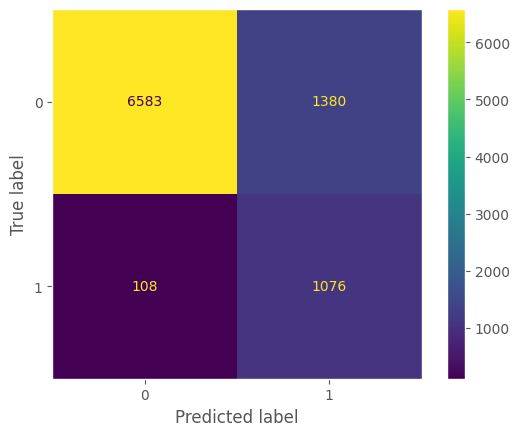

Accuracy Score: 83.7%


In [336]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,dt_pred,ax=plt.gca())
plt.grid(False)
plt.show()

dt_accuracy=np.round(accuracy_score(y_test,dt_pred),3)
print(f"Accuracy Score: {dt_accuracy*100}%")

nilai akurasi, precision, recall, dan F1

In [337]:
dt_precision=np.round(precision_score(y_test, dt_pred),3)
dt_recall=np.round(recall_score(y_test, dt_pred),3)
dt_f1=np.round(f1_score(y_test, dt_pred),3)

In [338]:
dt_score = {
    'Model': 'Decision Tree',
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'f1': dt_f1
}
dt_score = pd.DataFrame(dt_score, index=[''])
dt_score

Model  Accuracy  Precision  Recall     f1
  Decision Tree     0.837      0.438   0.909  0.591

melihat feature importance 

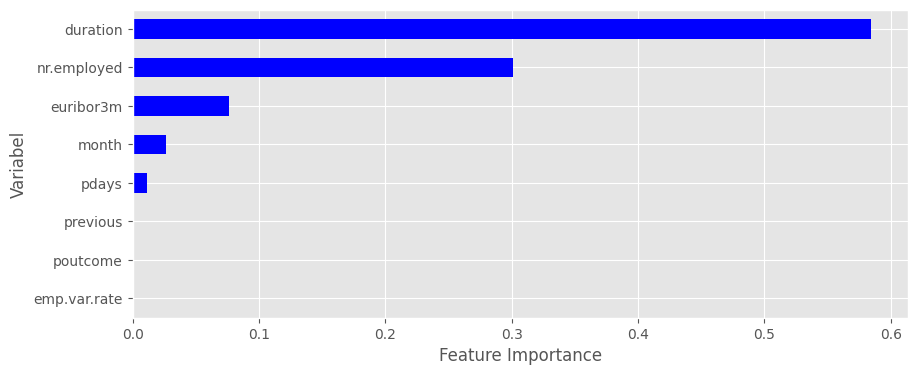

In [339]:
plt.figure(dpi=100)
pd.DataFrame(data=dt_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
            ).sort_values("Feature Importance",ascending=True).plot(figsize=(10,4),
                                                                     kind="barh",
                                                                     legend=None,
                                                                     color="blue",
                                                                     ax=plt.gca())
plt.xlabel("Feature Importance")
plt.ylabel("Variabel")
plt.show()

fitting seluruh dataset untuk membuat final model

In [340]:
final_dt_model = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=313)
final_dt_model.fit(X,y)

plt.figure(figsize=(20,10),dpi=1080)
plot_tree(final_dt_model,filled=True,feature_names=X.columns.tolist())
plt.show()

# Random Forest

mencari nilai n yang optimal

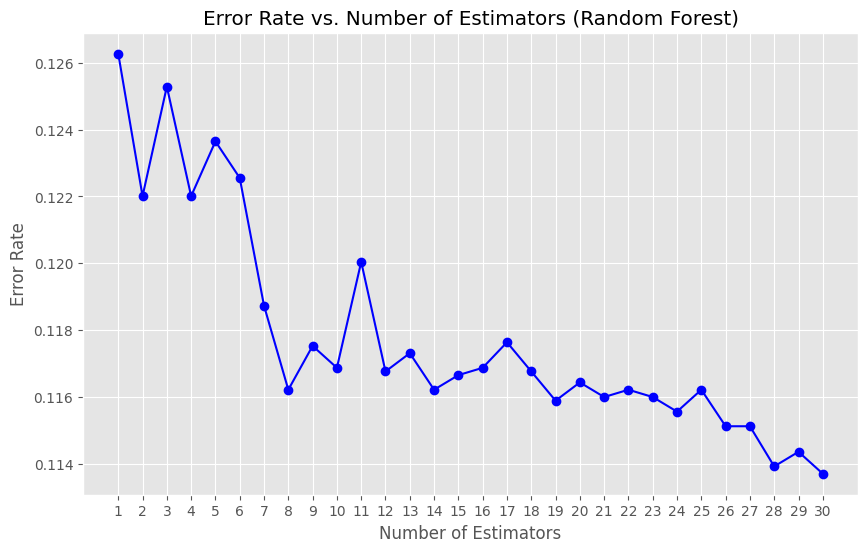

In [341]:
n_range = list(range(1,31))
error_rate = []
for i in n_range:
    model = RandomForestClassifier(n_estimators=i,class_weight="balanced",random_state=313)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    error_rate.append(error)

plt.figure(figsize=(10, 6))
plt.plot(n_range, error_rate, marker='o', linestyle='-', color='b')
plt.title('Error Rate vs. Number of Estimators (Random Forest)')
plt.xlabel('Number of Estimators')
plt.xticks(n_range)
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [342]:
optimal_n = n_range[np.argmin(error_rate)]
print(f"Optimal n value: {optimal_n}")


Optimal n value: 30


membuat model dengan n = 30

In [343]:
rf_model = RandomForestClassifier(n_estimators=optimal_n,class_weight="balanced",random_state=313)
rf_model.fit(scaled_X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=30,
                       random_state=313)

memprediksi dengan model

In [344]:
rf_pred = rf_model.predict(scaled_X_test)

evaluasi model

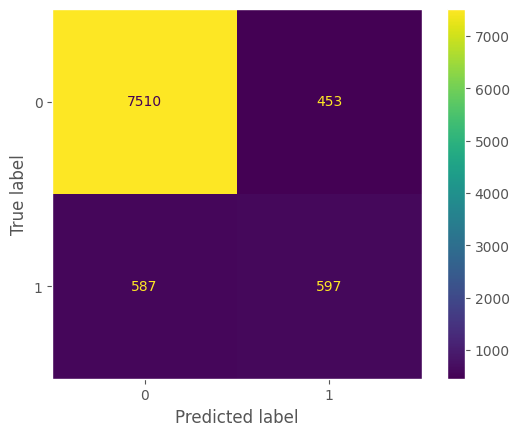

Accuracy Score: 88.6%


In [345]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,rf_pred,ax=plt.gca())
plt.grid(False)
plt.show()

rf_accuracy=np.round(accuracy_score(y_test,rf_pred),3)
print(f"Accuracy Score: {rf_accuracy*100}%")

nilai accuracy, precision, recall, dan F1

In [346]:
rf_precision=np.round(precision_score(y_test, rf_pred),3)
rf_recall=np.round(recall_score(y_test, rf_pred),3)
rf_f1=np.round(f1_score(y_test, rf_pred),3)

In [347]:
rf_score = {
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'f1': rf_f1
}
rf_score = pd.DataFrame(rf_score, index=[''])
rf_score

Model  Accuracy  Precision  Recall     f1
  Random Forest     0.886      0.569   0.504  0.534

melihat feature importance

In [348]:
plt.figure(dpi=200)
pd.DataFrame(data=rf_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
            ).sort_values("Feature Importance",ascending=True).plot(figsize=(10,4),
                                                                    kind="barh",
                                                                    legend=None,
                                                                    color="blue",
                                                                    ax=plt.gca())
plt.xlabel("Feature Importance")
plt.ylabel("Variabel")
plt.show()

fitting seluruh dataset untuk membuat final model

In [349]:
final_rf_model = RandomForestClassifier(n_estimators=optimal_n,class_weight="balanced",random_state=313)
final_rf_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', n_estimators=30,
                       random_state=313)

# Naives Bayes

membuat model

In [350]:
nb_model = GaussianNB()
nb_model.fit(scaled_X_train,y_train)

GaussianNB()

memprediksi dengan model

In [351]:
nb_pred = nb_model.predict(scaled_X_test)

evaluasi model

In [352]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,nb_pred,ax=plt.gca())
plt.grid(False)
plt.show()

nb_accuracy=np.round(accuracy_score(y_test,nb_pred),3)
print(f"Accuracy Score: {nb_accuracy*100}%")

Accuracy Score: 85.1%


nilai accuracy, precision, recall, dan F1

In [353]:
nb_precision=np.round(precision_score(y_test, nb_pred),3)
nb_recall=np.round(recall_score(y_test, nb_pred),3)
nb_f1=np.round(f1_score(y_test, nb_pred),3)

In [354]:
nb_score = {
    'Model': 'Naive Bayes',
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'f1': nb_f1
}
nb_score = pd.DataFrame(nb_score, index=[''])
nb_score

Model  Accuracy  Precision  Recall     f1
  Naive Bayes     0.851       0.43   0.459  0.444

fitting seluruh dataset untuk membuat final model

In [355]:
final_nb_model = GaussianNB()
final_nb_model.fit(X,y)

GaussianNB()

# Confusion Matrix

In [356]:
final_models = [final_lr_model, final_knn_model, final_svm_model, final_dt_model, final_rf_model, final_nb_model]
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for Final Models')

for model, name, ax in zip(final_models, model_names, axes.flatten()):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12}, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {name}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [357]:
model_scores=pd.concat([lr_score,knn_score,svm_score,dt_score,rf_score,nb_score])
model_scores

Model  Accuracy  Precision  Recall     f1
     Logistic Regression     0.845      0.449   0.856  0.589
     K-Nearest Neighbors     0.898      0.632   0.505  0.562
  Support Vector Machine     0.828      0.425   0.924  0.582
           Decision Tree     0.837      0.438   0.909  0.591
           Random Forest     0.886      0.569   0.504  0.534
             Naive Bayes     0.851      0.430   0.459  0.444

Akurasi:<br>K-Nearest Neighbors (KNN) memiliki akurasi tertinggi pada 0.898, menunjukkan tingkat kebenaran paling tinggi secara keseluruhan.
Support Vector Machine (SVM) memiliki akurasi terendah pada 0.828, menunjukkan tingkat kebenaran lebih rendah dibandingkan dengan model lainnya.

Presisi:<br>KNN memiliki presisi tertinggi pada 0.632, artinya memiliki jumlah false positive yang relatif rendah dibandingkan dengan true positive.
SVM memiliki presisi terendah pada 0.425, menunjukkan jumlah false positive yang lebih tinggi dibandingkan dengan true positive.

Recall:<br>SVM memiliki recall tertinggi pada 0.924, menunjukkan efektivitas dalam menangkap proporsi tinggi dari instance positif sebenarnya.
KNN memiliki recall terendah pada 0.505, menunjukkan kemampuan yang relatif lebih rendah dalam menangkap instance positif.

Skor F1:<br>SVM memiliki skor F1 tertinggi pada 0.582, yang merupakan nilai rata-rata harmonik dari presisi dan recall. Ini seimbang antara presisi dan recall.
Naive Bayes memiliki skor F1 terendah pada 0.444, menunjukkan adanya trade-off antara presisi dan recall.

## Memilih Model terbaik

Pemilihan model terbaik bergantung pada kebutuhan penggunaan, serta kompromi antara evaluation matrix yang berbeda. Berikut adalah beberapa pertimbangan umum:

**Akurasi dan Keseimbangan:**
- Jika kebenaran keseluruhan adalah kebutuhan utama, model dengan akurasi yang lebih tinggi seperti KNN dapat digunakan.
- Model dengan keseimbangan antara precision dan recall, dapat dilihat dari nilai F1 yang lebih tinggi seperti SVM.

**precision dan Recall:**
- Jika meminimalkan false positive (precision) penting untuk aplikasi Anda, model dengan presisi tinggi, seperti (KNN) dapat digunakan.
- Jika mendapatkan sebanyak mungkin true positive (recall) menjadi prioritas, model dengan recall tinggi, seperti Support Vector Machine (SVM), mungkin lebih cocok.

**Pertimbangan Konteks-Spesifik:**
- Pertimbangkan konteks dan persyaratan khusus kebutuhan. Sebagai contoh, dalam skenario diagnosis medis, recall mungkin lebih kritis untuk menghindari melewatkan kasus positif, meskipun dengan mengorbankan precision.

**Kompleksitas dan Interpretabilitas:**
- Evaluasi kompleksitas dan interpretabilitas model. Kadang-kadang, model yang lebih sederhana seperti Logistic Regression atau Decision Trees lebih disukai jika interpretabilitas penting.


# Membuat file yang berisi model untuk penggunaan lebih lanjut

In [358]:
models = [final_lr_model,final_knn_model,final_svm_model,
          final_dt_model,final_rf_model,final_nb_model]
file_names = ["logistic_regression","k-nearest_neighbors","support_vector_machine",
              "decision_tree","random_forest","naive_bayes"]

for i,j in zip(models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

logistic_regression.joblib has been saved successfully!
k-nearest_neighbors.joblib has been saved successfully!
support_vector_machine.joblib has been saved successfully!
decision_tree.joblib has been saved successfully!
random_forest.joblib has been saved successfully!
naive_bayes.joblib has been saved successfully!


model telah dimasukkan ke dalam file .joblib dan dapat digunakan untuk memprediksi data yang belum pernah digunakan sebelumnya